# üêÑ **An√°lisis de la producci√≥n lechera en granjas espa√±olas** üêÑ
**Analizando los factores clave que determinan su rendimiento.**

**Por: Miguel Diaz Perez de Juan y Dante Mathieu Schrantz Castro**

**[Acceso GitHub](https://github.com/DanteSc03/stata)**

En un sector tan competitivo como la producci√≥n de leche, ¬øqu√© hace que algunas granjas sean m√°s rentables que otras? ¬øEs el n√∫mero de vacas, la cantidad de tierra, la mano de obra, o la alimentaci√≥n lo que marca la diferencia? En este an√°lisis, intentaremos descifrar c√≥mo estos factores afectan la producci√≥n de leche y cu√°l es la influencia real de cada uno en el rendimiento de las granjas. Usaremos datos reales de unas 250 granjas del norte de Espa√±a, con registros de varios a√±os, para entender mejor el comportamiento de las variables que afectan a esta industria.

## 1Ô∏è‚É£ **Objetivo**

Nuestro objetivo es explorar la relaci√≥n entre las variables explicativas (como vacas, tierra, mano de obra y alimentaci√≥n) y la producci√≥n de leche. Usaremos nuestro conjunto de datos de producci√≥n lechera para obtener un modelo econom√©trico que nos permita entender c√≥mo estos factores afectan el rendimiento de las granjas, y qu√© variables tienen mayor influencia.

## 2Ô∏è‚É£ **¬øPor qu√©?**

La idea de este trabajo surgi√≥ una tarde entre Dante y yo, tomando un Colacao en medio de una conversaci√≥n sobre la realidad de las granjas lecheras en el norte de Espa√±a, especialmente en Galicia, de donde soy. Mientras charl√°bamos sobre c√≥mo muchas de estas granjas luchan por mantenerse a flote, nos dimos cuenta de que era un tema que merec√≠a ser estudiado. ¬øPor qu√© no explorar c√≥mo las variables econ√≥micas y operacionales de estas granjas afectan la producci√≥n de leche? As√≠ naci√≥ nuestra motivaci√≥n para analizar estos datos, con la intenci√≥n de aportar alguna luz sobre c√≥mo mejorar la eficiencia de las granjas lecheras y, de paso, comprender mejor la rentabilidad y la sostenibilidad del sector.

## 3Ô∏è‚É£ **Variables a considerar**

Las variables presentes en el conjunto de datos son las siguientes:

**Entradas:**
- **COWS:** N√∫mero de vacas en la granja.
- **LAND:** Medida de la cantidad de terreno disponible.
- **LABOR:** N√∫mero de trabajadores en la granja.
- **FEED:** Cantidad de alimentaci√≥n proporcionada.

**Variables transformadas (logaritmos):**

- **X1 (log de COWS):** Logaritmo del n√∫mero de vacas en la granja.
- **X2 (log de LAND):** Logaritmo de la cantidad de terreno disponible.
- **X3 (log de LABOR):** Logaritmo del n√∫mero de trabajadores.
- **X4 (log de FEED):** Logaritmo de la cantidad de alimentaci√≥n proporcionada.

**T√©rminos Translog (variables cuadr√°ticas y de productos cruzados):**

- **X11, X22, X33, X44:** Cuadr√°ticos de las variables logar√≠tmicas X1, X2, X3 y X4, respectivamente.
- **X12, X13, X14, X23, X24, X34:** Productos cruzados de las variables logar√≠tmicas, que capturan las interacciones no lineales entre ellas.

**Variables dummy de a√±o:**
- **YEAR93, YEAR94, ..., YEAR98:** Variables que indican el a√±o de observaci√≥n.

**Salida:**
- **MILK:** La producci√≥n total de leche de cada granja.
- **YIT (log de la producci√≥n de leche):** En nuestro caso no la usaremos, usaremos directamene el output de leche -> MILK para nuestros modelos y para el Time Series.

## 4Ô∏è‚É£ **Metodolog√≠a - Datos de Panel**

1. **Datos de Panel**: Dado que tenemos datos de varias granjas a lo largo de varios a√±os (N = 247, T = 6), el modelo adecuado para este an√°lisis es un modelo de **panel**. Esto nos permitir√° capturar tanto las variaciones a nivel de granja como las variaciones temporales.

2. **Regresi√≥n de Panel**: Usaremos una regresi√≥n de panel para analizar c√≥mo las variables de entrada y los efectos del a√±o influyen en la producci√≥n de leche. Adem√°s, probaremos con efectos fijos y aleatorios para ver qu√© tipo de especificaci√≥n se ajusta mejor a los datos.

3. **Multicolinealidad**: Antes de realizar la regresi√≥n, verificaremos si existe multicolinealidad entre las variables de entrada, usando el √≠ndice de **VIF** (Factor de Inflaci√≥n de la Varianza).

## 5Ô∏è‚É£ **Metodolog√≠a - Time Series**

1. **Series Temporales**: Dado que nuestro objetivo es predecir la producci√≥n de leche (**MILK**) a partir de sus valores pasados y de los lags de la variable **COWS**, aplicamos un an√°lisis de **series temporales**. En este an√°lisis, consideramos que la producci√≥n de leche depende de los valores previos de la variable de vacas.

2. **Autocorrelaci√≥n y Lags**: Despu√©s de obtener la serie temporal, hemos realizado un an√°lisis de **autocorrelaci√≥n** para identificar si los **lags de la variable COWS** son significativos para predecir el valor futuro de la producci√≥n de leche. Esto nos ayud√≥ a seleccionar los lags adecuados para el modelo.

3. **Modelos AR (Autoregresivos)**: Para predecir la producci√≥n futura de leche, aplicamos un **modelo AR** usando los **lags de COWS** seleccionados. Esto nos permiti√≥ capturar la relaci√≥n entre la producci√≥n de leche y los valores pasados de las vacas.

4. **Evaluaci√≥n de Resultados**: Finalmente, analizamos los resultados del modelo AR, evaluando la significancia de los coeficientes.


In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('/Applications/Stata/utilities')
from pystata import config
config.init('se')

%stata import delimited "/Users/danteschrantz/Desktop/UNAV/2024-2025/Modeling Trabajo Final/dairy.csv"


  ___  ____  ____  ____  ____ ¬Æ
 /__    /   ____/   /   ____/      StataNow 18.5
___/   /   /___/   /   /___/       SE‚ÄîStandard Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-782-8272        https://www.stata.com
                                   979-696-4600        service@stata.com

Stata license: Single-user , expiring 25 Nov 2024
Serial number: 401809408832
  Licensed to: Dante Schrantz
               Universidad de Navarra

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.
(encoding automatically selected: ISO-8859-1)
(28 vars, 1,482 obs)


#### **Fuentes de Datos**

Los datos utilizados provienen de un conjunto de datos sobre la producci√≥n lechera en granjas espa√±olas, disponible en la web de NYU Stern, que proporciona acceso a diversos conjuntos de datos de panel utilizados en econometr√≠a. Esta fuente es una recopilaci√≥n de datasets que pueden ser utilizados para an√°lisis econ√≥micos y agr√≠colas.

Se puede encontrar m√°s informaci√≥n y acceder al conjunto de datos en el siguiente enlace: [NYU Stern Panel Data Sets](https://pages.stern.nyu.edu/~wgreene/Econometrics/PanelDataSets.htm).

In [2]:
%stata summarize



    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        farm |      1,482         124    71.32624          1        247
        year |      1,482        95.5    1.708402         93         98
        cows |      1,482    22.11619    11.27415        4.5       82.3
        land |      1,482     12.9857    6.172051          2       45.1
        milk |      1,482    131106.6    92583.98      14410     727281
-------------+---------------------------------------------------------
       labor |      1,482    1.671997    .5527831          1          4
        feed |      1,482    57941.35    47981.24   3924.141   376731.6
         yit |      1,482    11.57749    .6434377   9.575678   13.49707
          x1 |      1,482   -1.40e-09    .4885577  -1.474623   1.431671
          x2 |      1,482    5.16e-09    .4559323  -1.767564   1.348171
-------------+-------------------------------------------------

In [3]:
%stata label variable farm "Identificador √∫nico de la granja"
%stata label variable year "A√±o de la observaci√≥n (93-98)"
%stata label variable cows "N√∫mero de vacas en la granja"
%stata label variable land "Superficie de tierra utilizada en hect√°reas"
%stata label variable labor "Horas de trabajo de los empleados"
%stata label variable feed "Cantidad de alimentaci√≥n proporcionada a las vacas"
%stata label variable yit "Logaritmo de la producci√≥n de leche"
%stata label variable x1 "Deviation from the mean (log)"
%stata label variable x2 "Deviation from the mean (log)"
%stata label variable x3 "Deviation from the mean (log)"
%stata label variable x4 "Deviation from the mean (log)"
%stata label variable x11 "Square of X1"
%stata label variable x22 "Square of X2"
%stata label variable x33 "Square of X3"
%stata label variable x44 "Square of X4"
%stata label variable x12 "Cross-product of X1 and X2"
%stata label variable x13 "Cross-product of X1 and X3"
%stata label variable x14 "Cross-product of X1 and X4"
%stata label variable x23 "Cross-product of X2 and X3"
%stata label variable x24 "Cross-product of X2 and X4"
%stata label variable x34 "Cross-product of X3 and X4"
%stata label variable year93 "Dummy variable for year 1993"
%stata label variable year94 "Dummy variable for year 1994"
%stata label variable year95 "Dummy variable for year 1995"
%stata label variable year96 "Dummy variable for year 1996"
%stata label variable year97 "Dummy variable for year 1997"
%stata label variable year98 "Dummy variable for year 1998"

In [4]:
%stata describe


Contains data
 Observations:         1,482                  
    Variables:            28                  
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
farm            int     %8.0g                 Identificador √∫nico de la granja
year            byte    %8.0g                 A√±o de la observaci√≥n (93-98)
cows            float   %9.0g                 N√∫mero de vacas en la granja
land            float   %9.0g                 Superficie de tierra utilizada en
                                                hect√°reas
milk            long    %12.0g                MILK
labor           float   %9.0g                 Horas de trabajo de los empleados
feed            float   %9.0g                 Cantidad de alimentaci√≥n
                                                propo

(bin=20, start=4.5, width=3.8900002)


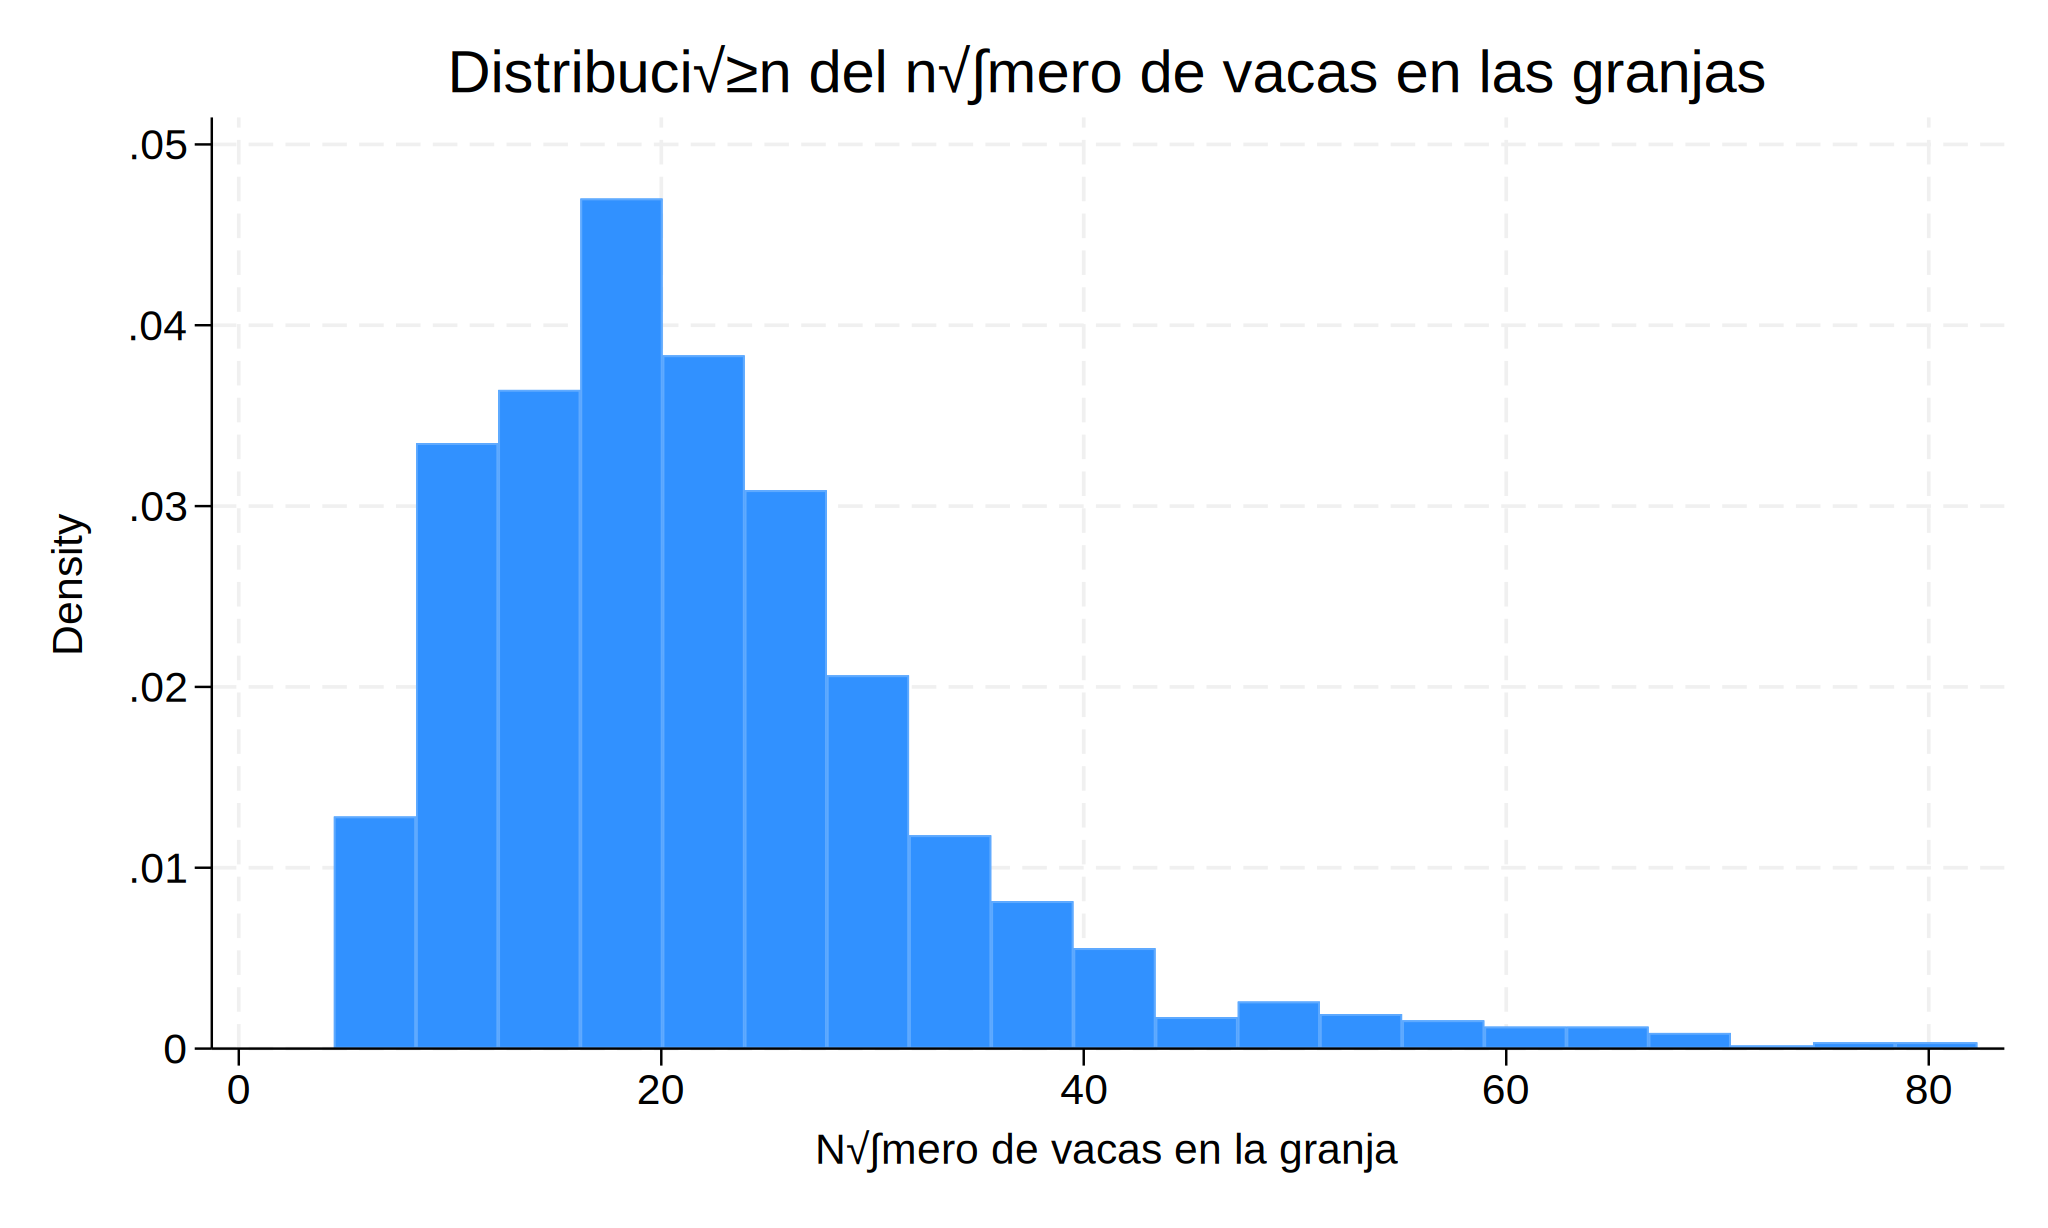

(bin=20, start=2, width=2.1549999)


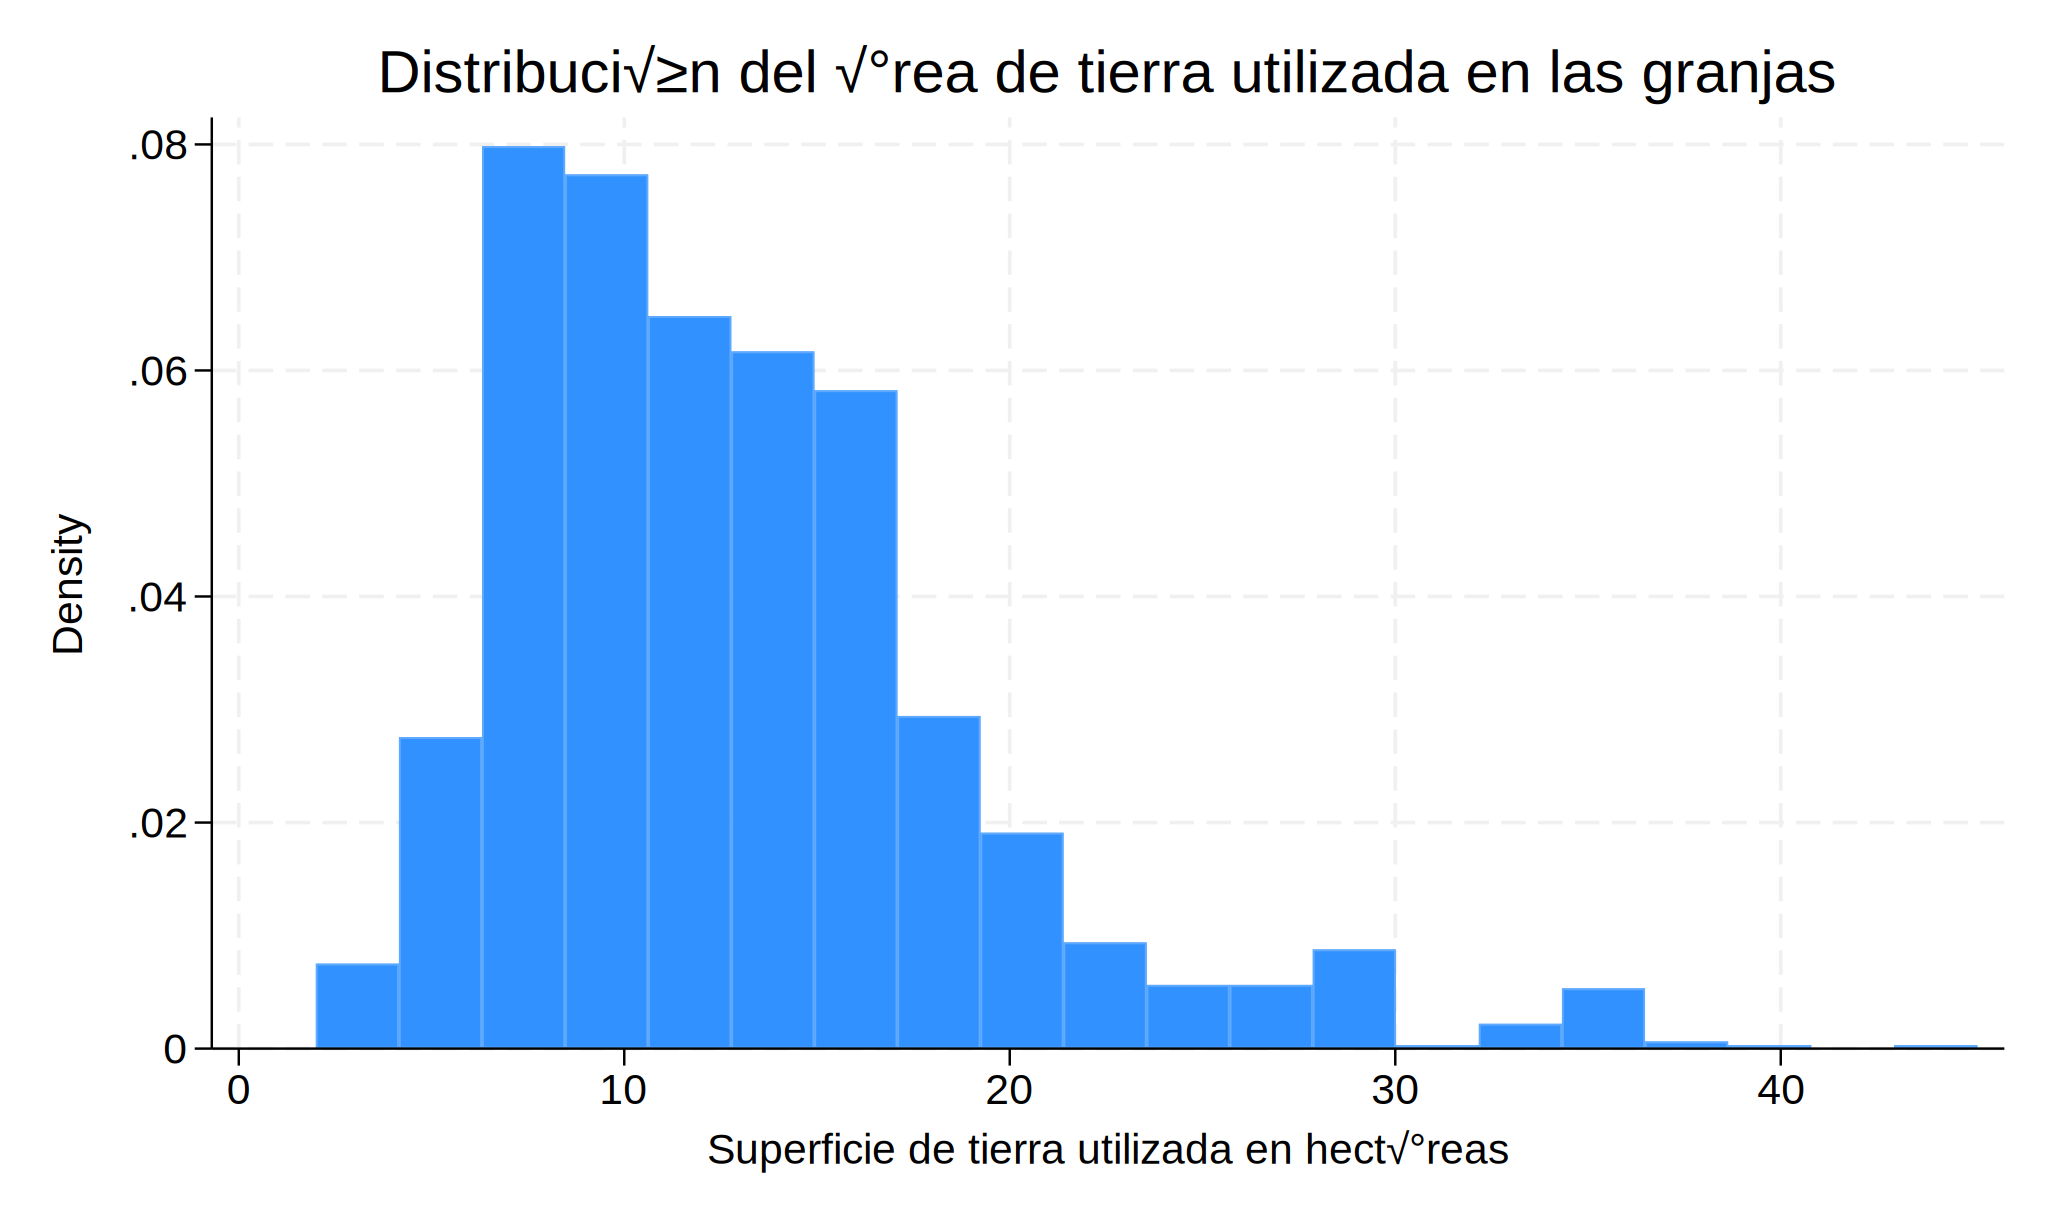

(bin=20, start=1, width=.15)


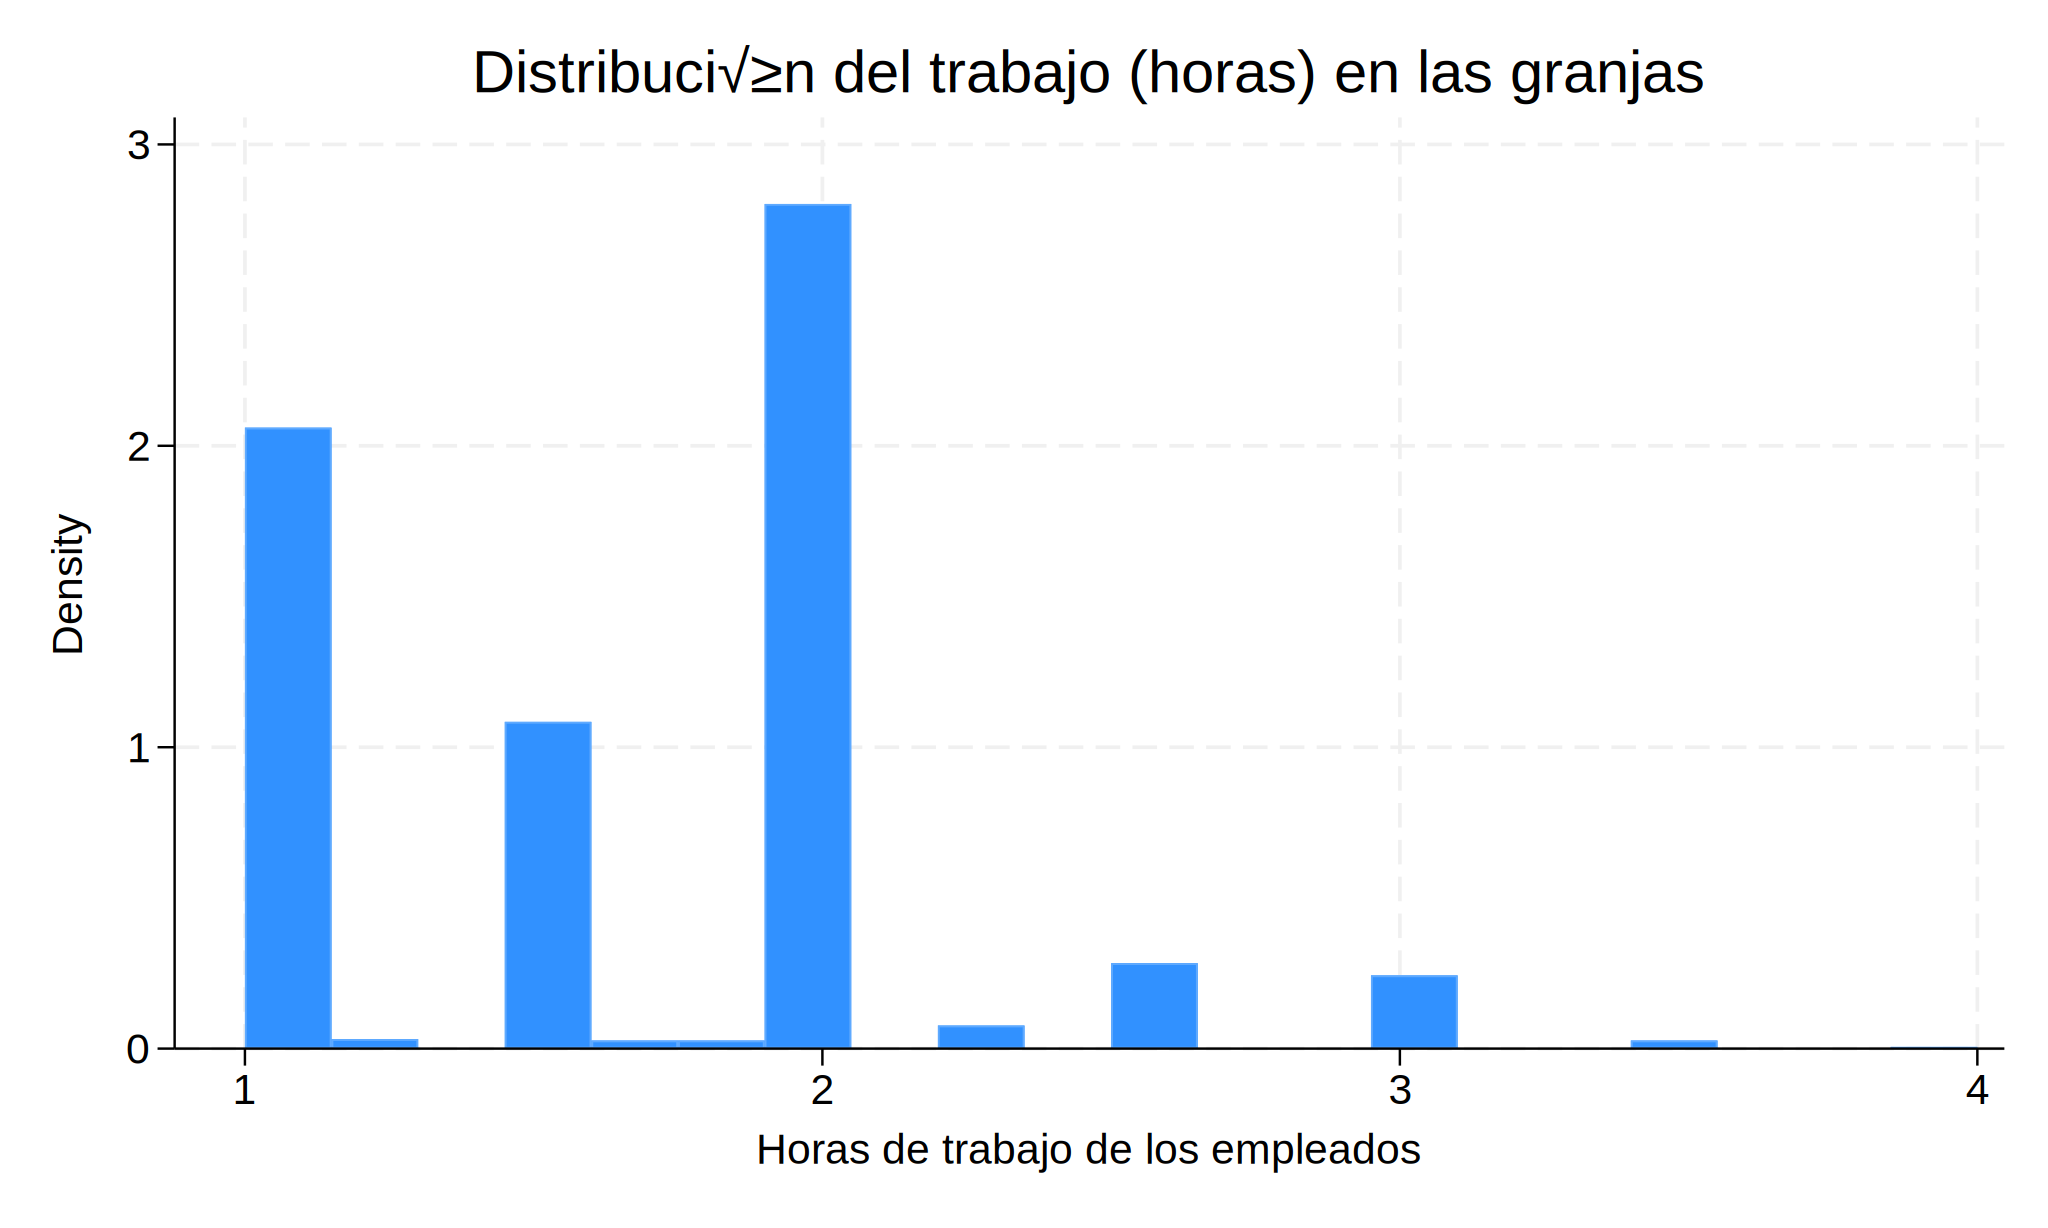

(bin=20, start=3924.1411, width=18640.371)


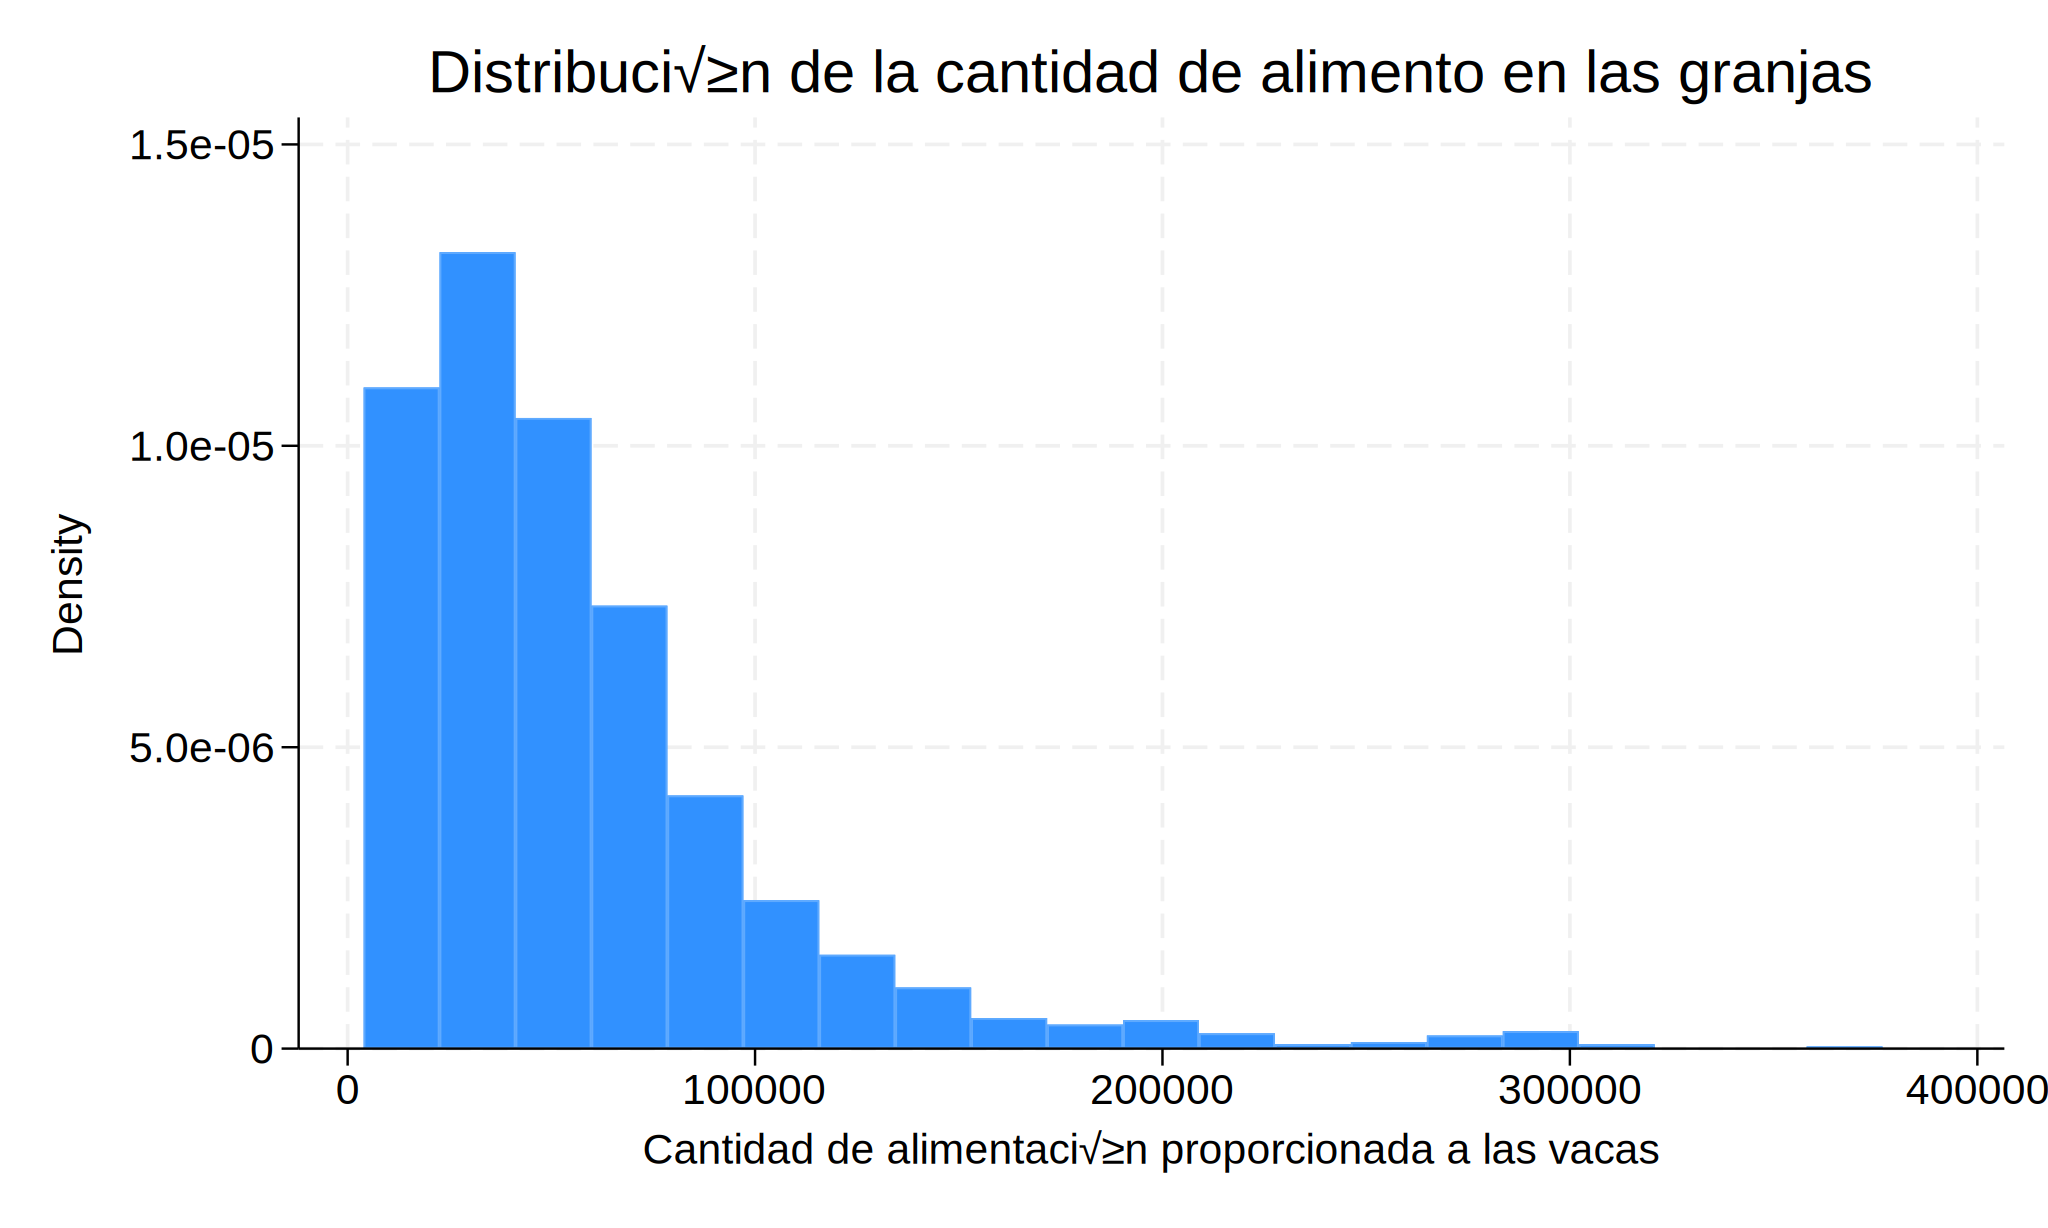

In [5]:
%stata histogram cows, bin(20) title("Distribuci√≥n del n√∫mero de vacas en las granjas") xlabel(, grid) ylabel(, grid)
%stata histogram land, bin(20) title("Distribuci√≥n del √°rea de tierra utilizada en las granjas") xlabel(, grid) ylabel(, grid)
%stata histogram labor, bin(20) title("Distribuci√≥n del trabajo (horas) en las granjas") xlabel(, grid) ylabel(, grid)
%stata histogram feed, bin(20) title("Distribuci√≥n de la cantidad de alimento en las granjas") xlabel(, grid) ylabel(, grid)

### 1. Distribuci√≥n del N√∫mero de Vacas en las GranjasüêÆ
- **Forma de la Distribuci√≥n**: La distribuci√≥n es asim√©trica positiva (con sesgo a la derecha), lo cual significa que la mayor√≠a de las granjas tienen un n√∫mero relativamente bajo de vacas, mientras que pocas granjas tienen un n√∫mero mas alto de vacas.
- **Moda**: El m√°ximo de la distribuci√≥n se encuentra entre 15 y 25 vacas, lo que sugiere que la mayor√≠a de las granjas tienen un n√∫mero de vacas en este rango.
- **Cola Derecha**: La cola derecha es larga, indicando que hay algunas granjas con un n√∫mero significativamente mayor de vacas, aunque son pocas en comparaci√≥n con la mayor√≠a.

### 2. Distribuci√≥n del √Årea de Tierra Utilizada en las Granjas‚õ∞Ô∏è
- **Forma de la Distribuci√≥n**: La distribuci√≥n del √°rea de tierra tambi√©n muestra un sesgo a la derecha, similar a la distribuci√≥n del n√∫mero de vacas. Esto indica que la mayor√≠a de las granjas tienen una superficie relativamente peque√±a, mientras que hay pocas con grandes extensiones de tierra.
- **Moda**: La moda se encuentra entre 8 y 12 hect√°reas, lo cual sugiere que la mayor√≠a de las granjas utilizan una superficie en este rango.
- **Cola Derecha**: La cola es m√°s larga, lo que implica que hay algunas granjas que usan una gran cantidad de tierra, aunque son pocas.

### 3. Distribuci√≥n del Trabajo en las Granjasüë®‚Äçüåæ
- **Forma de la Distribuci√≥n**: La distribuci√≥n es claramente asim√©trica y discontinua, mostrando varios picos. Hay dos valores de densidad altos, correspondientes a las horas de trabajo en la granja, posiblemente indicando categor√≠as comunes.
- **Picos**:
  - El primer pico, correspondiente a un valor de alrededor de 1, podr√≠a indicar granjas con trabajo muy reducido o granjas peque√±as con pocos empleados.
  - El segundo pico, m√°s alto, se encuentra alrededor de 2. Esto sugiere que muchas granjas tienen una asignaci√≥n m√°s regular de trabajo, que puede corresponder a la mayor√≠a de las actividades requeridas.
- **Anomal√≠as**: La presencia de otros picos peque√±os sugiere variabilidad en la cantidad de trabajo entre granjas. Esto podr√≠a deberse a diferencias en el tama√±o de las granjas o a la estacionalidad del trabajo.

### 4. Distribuci√≥n de la Cantidad de Alimento Proporcionada a las Vacasü•ó
- **Forma de la Distribuci√≥n**: Esta distribuci√≥n tiene un sesgo positivo muy marcado, lo que indica que la mayor√≠a de las granjas proporcionan cantidades relativamente bajas de alimento, mientras que algunas pocas granjas proporcionan una cantidad considerablemente mayor.
- **Moda**: La mayor densidad de alimentaci√≥n se encuentra en el rango m√°s bajo, probablemente por debajo de 50,000 unidades. Esto sugiere que la mayor√≠a de las granjas tienen una pol√≠tica de alimentaci√≥n moderada.
- **Cola Derecha Larga**: La cola derecha larga muestra que hay algunas granjas que utilizan mucha m√°s alimentaci√≥n. Esto podr√≠a deberse a que estas granjas tienen m√°s vacas, son m√°s intensivas, o manejan ganado con dietas m√°s especializadas.

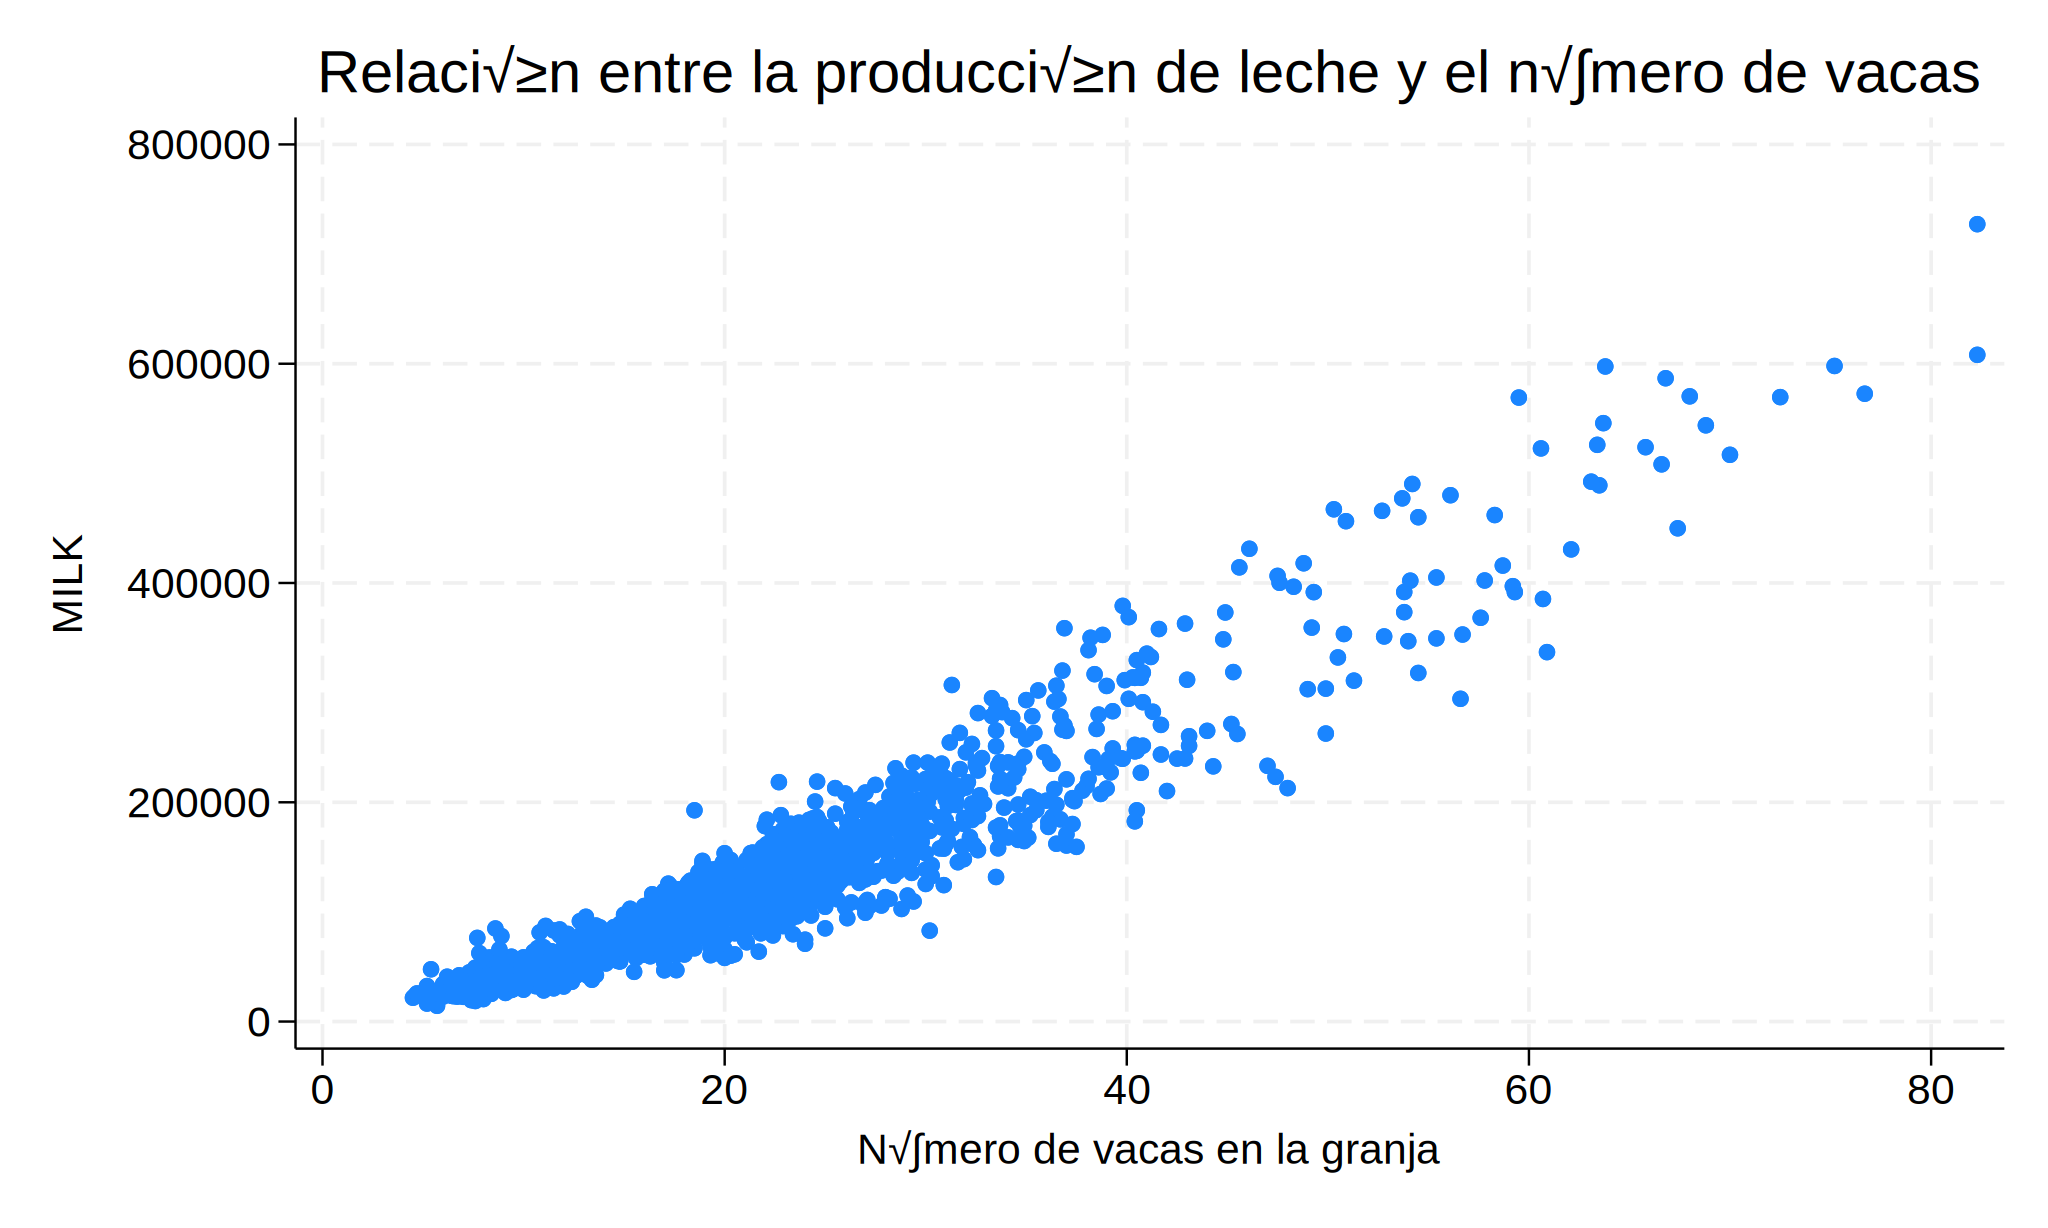

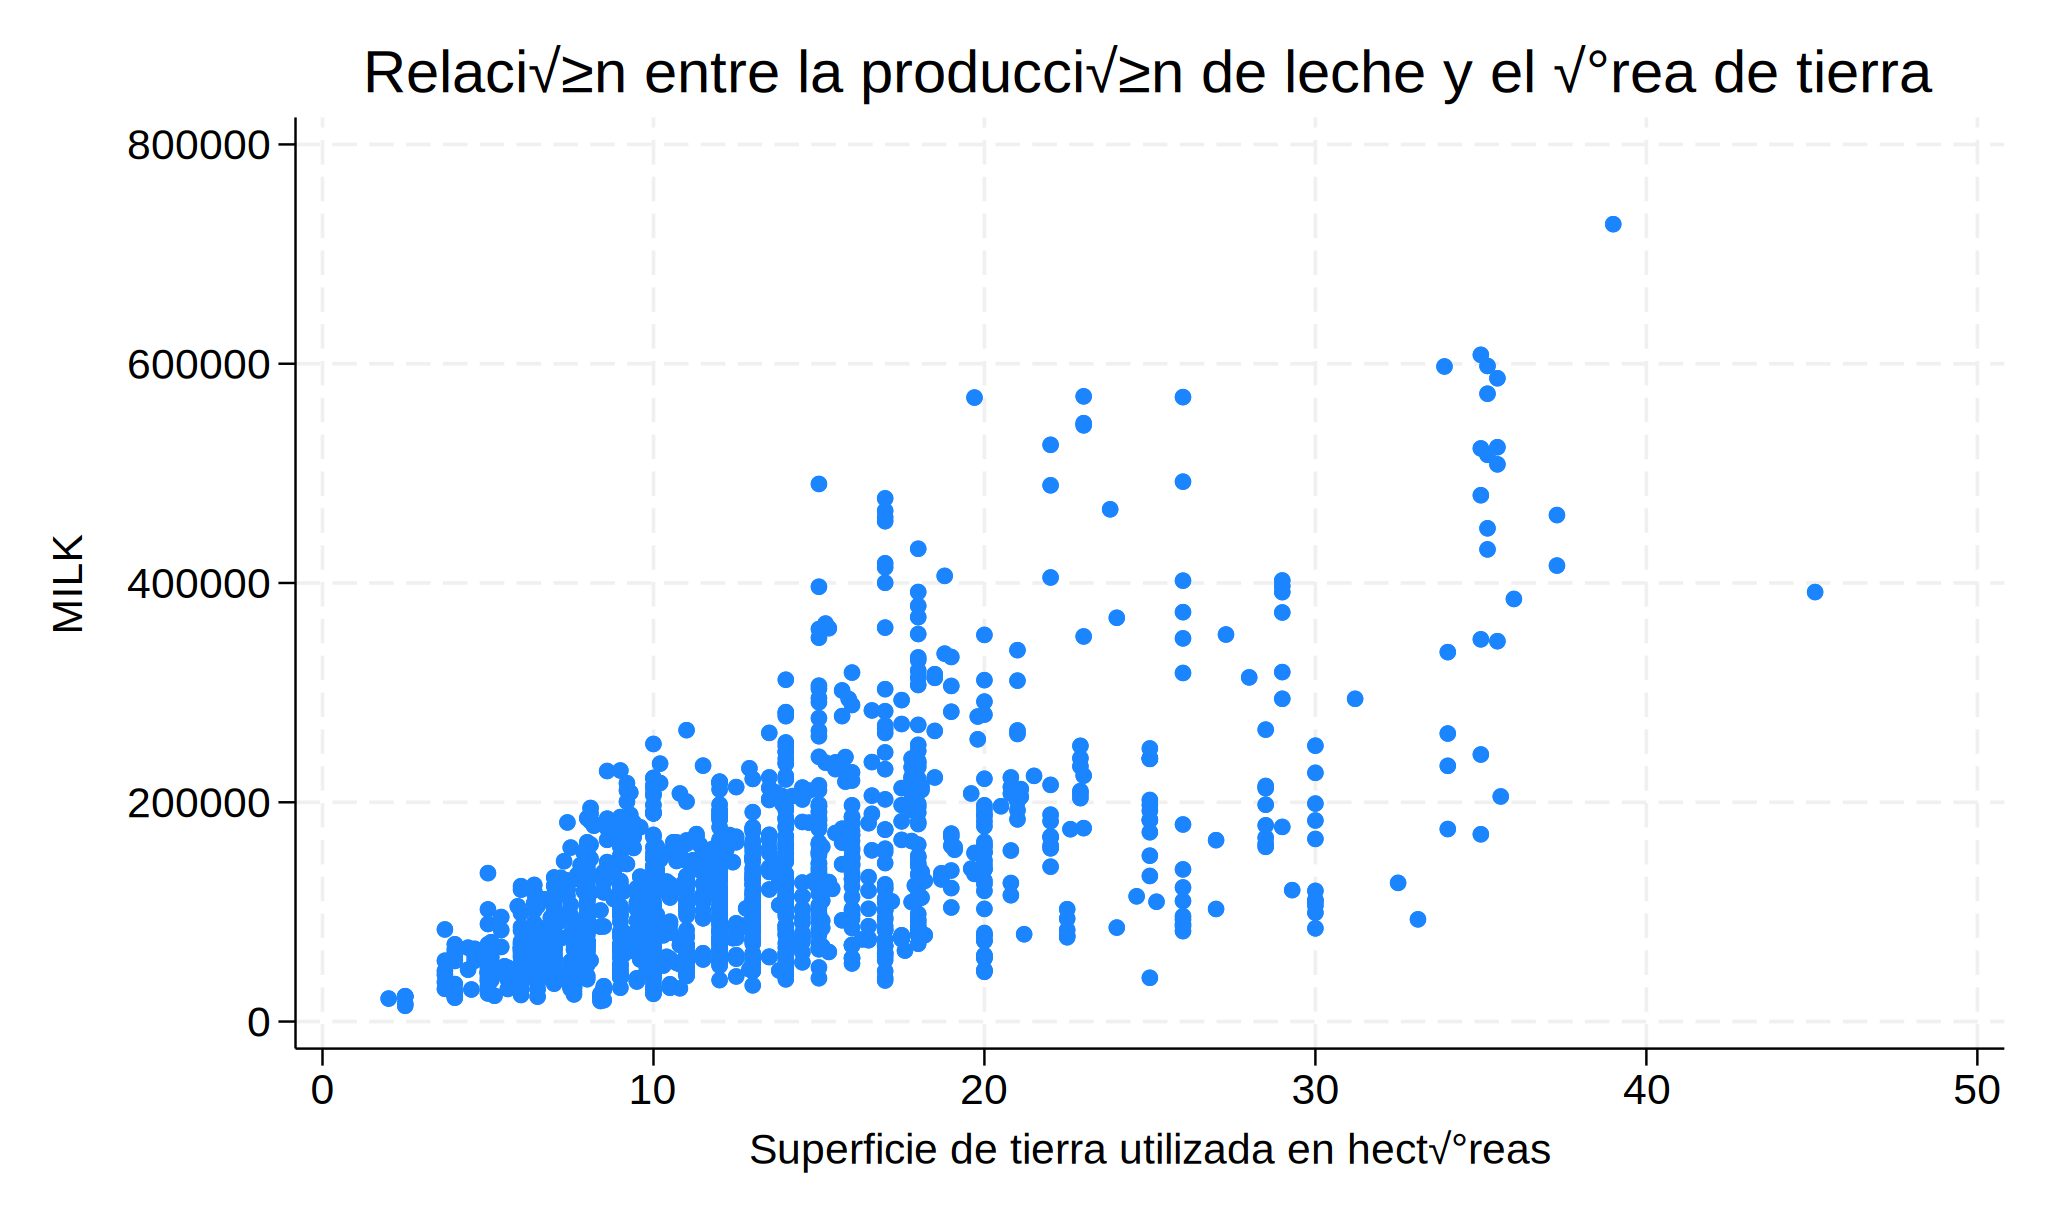

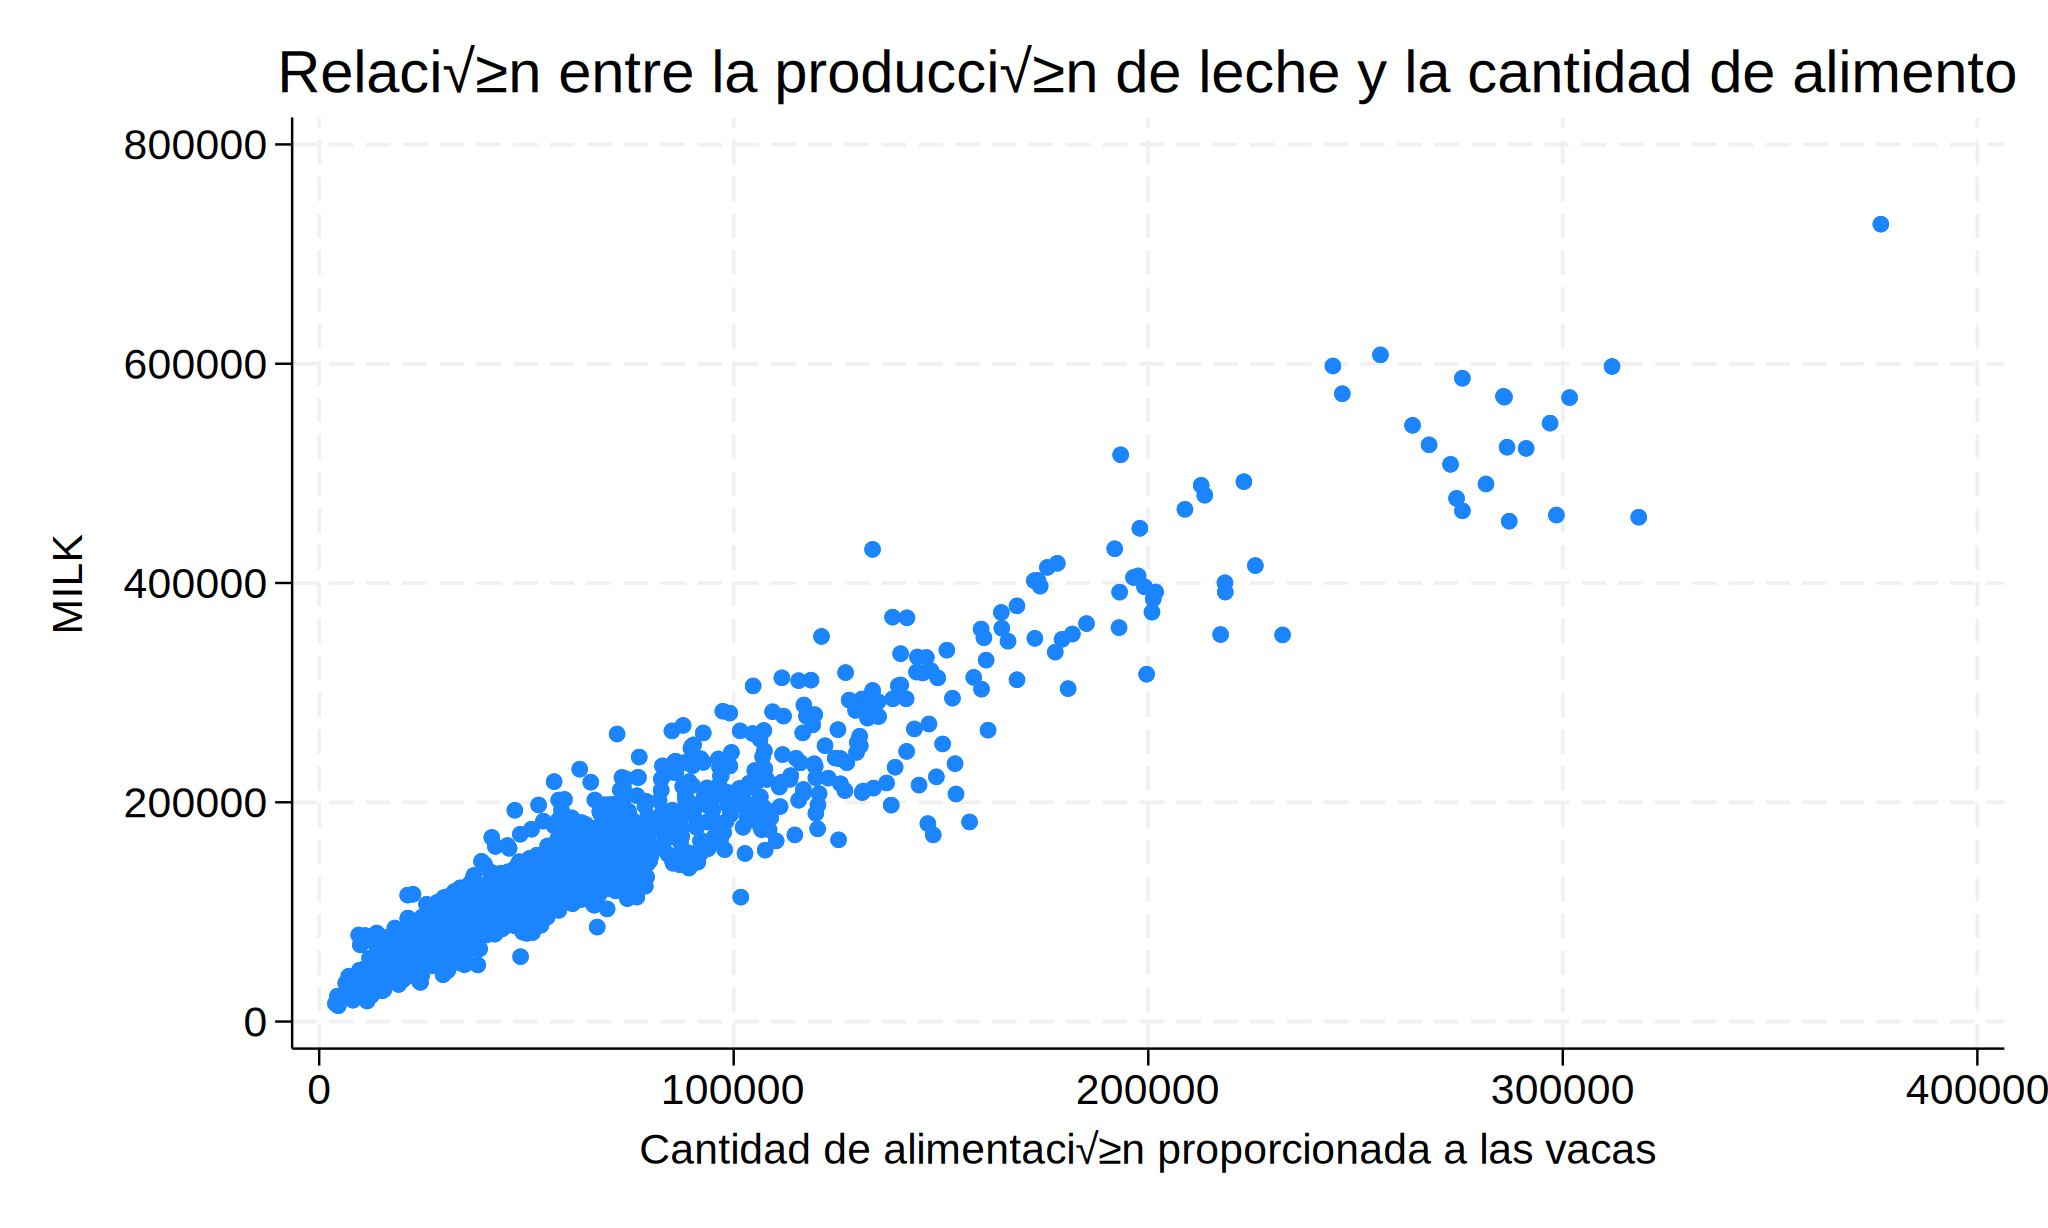

In [6]:
%stata scatter milk cows, title("Relaci√≥n entre la producci√≥n de leche y el n√∫mero de vacas")
%stata scatter milk land, title("Relaci√≥n entre la producci√≥n de leche y el √°rea de tierra")
%stata scatter milk feed, title("Relaci√≥n entre la producci√≥n de leche y la cantidad de alimento")

### 1. Relaci√≥n entre Producci√≥n de Leche y N√∫mero de Vacas ü•õüêÆ
- **Correlaci√≥n Positiva Fuerte**: El gr√°fico muestra una clara relaci√≥n positiva entre el n√∫mero de vacas y la producci√≥n de leche. A medida que aumenta el n√∫mero de vacas, tambi√©n lo hace la producci√≥n de leche. Esta correlaci√≥n tiene una tendencia lineal, lo que indica que el n√∫mero de vacas es un factor determinante y directo en la producci√≥n de leche.
- **Dispersi√≥n**: Aunque la mayor√≠a de los puntos siguen una tendencia bastante clara, hay cierta variabilidad en la producci√≥n de leche entre granjas con un n√∫mero similar de vacas, lo cual podr√≠a deberse a factores adicionales, como la eficiencia de manejo, la calidad del alimento, o la salud del ganado.

### 2. Relaci√≥n entre Producci√≥n de Leche y √Årea de Tierra Utilizada ü•õ‚õ∞Ô∏è
- **Relaci√≥n Positiva con Variabilidad**: Tambi√©n se observa una tendencia positiva en la relaci√≥n entre la superficie de tierra utilizada y la producci√≥n de leche, aunque la correlaci√≥n parece ser m√°s dispersa comparada con el n√∫mero de vacas. Esto sugiere que, aunque m√°s tierra puede estar asociada con una mayor producci√≥n de leche, no necesariamente es el √∫nico factor, y hay m√°s variabilidad en la producci√≥n con respecto a la cantidad de tierra.
- **Tendencia No Lineal**: La producci√≥n de leche tiende a aumentar con m√°s √°rea de tierra, pero no de manera tan predecible como con el n√∫mero de vacas. Podr√≠a ser que el tama√±o de la tierra tambi√©n dependa de c√≥mo est√° siendo utilizada: por ejemplo, para pastos, almacenamiento, o incluso √°reas que no contribuyen directamente a la producci√≥n.

### 3. Relaci√≥n entre Producci√≥n de Leche y Cantidad de Alimento Proporcionado ü•õü•ó
- **Correlaci√≥n Positiva Fuerte**: Este gr√°fico muestra una relaci√≥n positiva muy fuerte entre la cantidad de alimento proporcionado y la producci√≥n de leche. A medida que aumenta la cantidad de alimento, tambi√©n lo hace la producci√≥n de leche de manera casi proporcional. Esto sugiere que el alimento es uno de los principales factores que impulsa la producci√≥n de leche.
- **Menos Variabilidad**: La dispersi√≥n de los puntos alrededor de la l√≠nea de tendencia es menor que en los otros gr√°ficos, lo cual indica que la alimentaci√≥n tiene un impacto muy predecible y consistente sobre la producci√≥n de leche. Esto hace que sea un factor clave para incrementar la producci√≥n de manera m√°s controlada.

In [7]:
%stata cor milk cows land labor feed
%stata sum milk cows land labor feed

(obs=1,482)

             |     milk     cows     land    labor     feed
-------------+---------------------------------------------
        milk |   1.0000
        cows |   0.9466   1.0000
        land |   0.6228   0.7022   1.0000
       labor |   0.5403   0.5618   0.3561   1.0000
        feed |   0.9575   0.9003   0.5609   0.5059   1.0000


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        milk |      1,482    131106.6    92583.98      14410     727281
        cows |      1,482    22.11619    11.27415        4.5       82.3
        land |      1,482     12.9857    6.172051          2       45.1
       labor |      1,482    1.671997    .5527831          1          4
        feed |      1,482    57941.35    47981.24   3924.141   376731.6


### An√°lisis de Correlaci√≥n y Estad√≠sticas Descriptivas

La producci√≥n de leche se correlaciona fuertemente con el alimento (`0.9575`) y el n√∫mero de vacas (`0.9466`). Tierra (`0.6228`) y trabajo (`0.5403`) tienen una correlaci√≥n m√°s baja con la producci√≥n. La cantidad de alimento y el n√∫mero de vacas son los principales factores para aumentar la producci√≥n.

In [8]:
%stata regress milk cows land labor feed


      Source |       SS           df       MS      Number of obs   =     1,482
-------------+----------------------------------   F(4, 1477)      =   7779.62
       Model |  1.2120e+13         4  3.0299e+12   Prob > F        =    0.0000
    Residual |  5.7524e+11     1,477   389465851   R-squared       =    0.9547
-------------+----------------------------------   Adj R-squared   =    0.9546
       Total |  1.2695e+13     1,481  8.5718e+09   Root MSE        =     19735

------------------------------------------------------------------------------
        milk | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        cows |   3644.012    129.804    28.07   0.000     3389.392    3898.632
        land |  -58.63673   120.1844    -0.49   0.626     -294.387    177.1136
       labor |   2031.415   1123.863     1.81   0.071    -173.1226    4235.952
        feed |   1.069114   .0252323    42.37   0.

In [9]:
%stata vif


    Variable |       VIF       1/VIF  
-------------+----------------------


        cows |      8.14    0.122792
        feed |      5.57    0.179415
        land |      2.09    0.477924
       labor |      1.47    0.681362
-------------+----------------------
    Mean VIF |      4.32


Medimos la colinealidad entre las variables por el VIF. Un VIF que supera los 10 nos se√±ala colinealidad, sin embargo, en esta situaci√≥n, todos los VIFs se encuentran por debajo de 10, lo que indica que no existe una multicolinealidad relevante entre nuestras variables.

Las vacas y el alimento son factores esenciales para comprender la producci√≥n de leche.
La regi√≥n no ejerce un efecto relevante en este modelo, mientras que la variable labor ejerce un efecto residual.
El modelo presenta un adecuado ajuste (R-cuadrado = 0.9547), lo que indica que la regresi√≥n recoge la mayor parte de la variabilidad en la producci√≥n l√°ctea, aunque existen posibles mejoras.


## Datos de Panel

In [10]:
%stata xtset farm year


Panel variable: farm (strongly balanced)
 Time variable: year, 93 to 98
         Delta: 1 unit


In [11]:
%stata xtreg milk cows land labor feed, fe
%stata estimates store fe_model


Fixed-effects (within) regression               Number of obs     =      1,482
Group variable: farm                            Number of groups  =        247

R-squared:                                      Obs per group:
     Within  = 0.8759                                         min =          6
     Between = 0.9642                                         avg =        6.0
     Overall = 0.9536                                         max =          6

                                                F(4, 1231)        =    2172.03
corr(u_i, Xb) = -0.0685                         Prob > F          =     0.0000

------------------------------------------------------------------------------
        milk | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        cows |   4110.793   174.6928    23.53   0.000     3768.065    4453.522
        land |   162.0506   167.2217     0.97   0.333    -166.02

In [12]:
%stata xtreg milk cows land labor feed, re
%stata estimates store re_model


Random-effects GLS regression                   Number of obs     =      1,482
Group variable: farm                            Number of groups  =        247

R-squared:                                      Obs per group:
     Within  = 0.8757                                         min =          6
     Between = 0.9649                                         avg =        6.0
     Overall = 0.9543                                         max =          6

                                                Wald chi2(4)      =   15458.17
corr(u_i, X) = 0 (assumed)                      Prob > chi2       =     0.0000

------------------------------------------------------------------------------
        milk | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
        cows |   3936.384   140.5181    28.01   0.000     3660.973    4211.794
        land |   42.54122    140.092     0.30   0.761    -232.03

In [13]:
%stata xttest0


Breusch and Pagan Lagrangian multiplier test for random effects

        milk[farm,t] = Xb + u[farm] + e[farm,t]

        Estimated results:
                         |       Var     SD = sqrt(Var)
                ---------+-----------------------------
                    milk |   8.57e+09       92583.98
                       e |   1.52e+08       12346.39
                       u |   2.39e+08       15445.67

        Test: Var(u) = 0
                             chibar2(01) =  1345.08
                          Prob > chibar2 =   0.0000


In [14]:
%stata hausman fe_model re_model


Note: the rank of the differenced variance matrix (3) does not equal the number
        of coefficients being tested (4); be sure this is what you expect, or
        there may be problems computing the test.  Examine the output of your
        estimators for anything unexpected and possibly consider scaling your
        variables so that the coefficients are on a similar scale.

                 ---- Coefficients ----
             |      (b)          (B)            (b-B)     sqrt(diag(V_b-V_B))
             |    fe_model     re_model      Difference       Std. err.
-------------+----------------------------------------------------------------
        cows |    4110.793     3936.384        174.4096        103.7895
        land |    162.0506     42.54122        119.5094        91.30892
       labor |    2815.646     2262.435        553.2107        1563.496
        feed |    .9590173     .9900496       -.0310323        .0115374
------------------------------------------------------------

En este estudio, hemos tenido en cuenta dos m√©todos para modelar los datos del panel: 
1.los efectos fijos (FE) y 2.los efectos aleatorios (RE). Los efectos fijos (FE) presuponen que las variaciones entre las unidades (en esta situaci√≥n, las granjas) son resultado de caracter√≠sticas no detectadas que permanecen inalterables a trav√©s del tiempo. Este modelo resulta beneficioso cuando se considera que las discrepancias no detectadas entre las unidades podr√≠an estar vinculadas con las variables que explican el modelo. En contraposici√≥n, el modelo de efectos aleatorios (RE) sostiene que las variaciones entre las unidades son aleatorias y no guardan correlaci√≥n con las variables explicativas. En otras palabras, se manejan los efectos no detectados como un elemento de error aleatorio.

La selecci√≥n entre FE y RE se fundamenta en la relevancia de los efectos aleatorios, que se evalu√≥ a trav√©s del test de Breusch-Pagan, logrando un valor p bastante bajo (0.0000), lo que se√±ala que los efectos aleatorios son relevantes. As√≠ pues, se opta por el modelo de efectos aleatorios (RE), dado que posibilita una eficacia superior en las estimaciones al evitar la adopci√≥n de una correlaci√≥n directa entre los atributos no detectados y las variables del modelo.


La prueba de Hausman nos da un valor de chi2 de 15.78 y una probabilidad de 0.0456, lo cual significa que rechazamos la hip√≥tesis nula. Esto quiere decir que las diferencias en los coeficientes entre los modelos de efectos fijos (FE) y efectos aleatorios (RE) no son aleatorias. Por lo tanto, el modelo de efectos fijos es el m√°s adecuado para este an√°lisis, ya que los resultados indican que el modelo de efectos aleatorios no es consistente.

( A√±adir que: El test de Breusch-Pagan es un diagn√≥stico adicional que ayuda a confirmar o rechazar la importancia de los efectos aleatorios en el modelo, pero, si la prueba de Hausman indica que los efectos fijos son preferibles, lo m√°s recomendable es seguir con el modelo de efectos fijos, incluso si el test de Breusch-Pagan sugiere lo contrario; de ah√≠ nuestra conslusi√≥n. )

In [15]:
%stata xtreg milk cows land labor i.year, fe


Fixed-effects (within) regression               Number of obs     =      1,482
Group variable: farm                            Number of groups  =        247

R-squared:                                      Obs per group:
     Within  = 0.7724                                         min =          6
     Between = 0.9171                                         avg =        6.0
     Overall = 0.8996                                         max =          6

                                                F(8, 1227)        =     520.54
corr(u_i, Xb) = -0.1582                         Prob > F          =     0.0000

------------------------------------------------------------------------------
        milk | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        cows |   7878.819   177.9992    44.26   0.000     7529.602    8228.035
        land |   254.9118   227.8185     1.12   0.263    -192.04

El modelo de efectos fijos (FE) indica que tanto la cantidad de vacas como el gasto en comida son los factores clave que influyen de manera positiva en la producci√≥n de leche. En cambio, el tama√±o del terreno y la fuerza laboral no son factores relevantes en este modelo. Decir que los efectos anuales s√≠ son significativos y evidencian un incremento en la producci√≥n l√°ctea a trav√©s del tiempo.


El **Rho** del 65.55% sugiere que una parte significativa de la variabilidad en la producci√≥n de leche entre las granjas se debe a factores espec√≠ficos de cada granja que <span style="color:red">NO</span> hemos considerado en nuestras variables explicativas. Este valor refleja la influencia de caracter√≠sticas no observadas de las granjas.

Por otro lado, el **R¬≤ dentro del modelo de efectos fijos** es alto (88.05%), lo que indica que nuestras variables explicativas (como el n√∫mero de vacas, la alimentaci√≥n, la mano de obra y la superficie) explican muy bien la variabilidad en la producci√≥n de leche dentro de cada granja a lo largo del tiempo. Esto significa que nuestro modelo es eficaz para capturar los efectos de las variables observadas sobre la producci√≥n de leche dentro de las granjas.

‚û°Ô∏è Entonces, aunque ciertamente nuestras variables explicativas son muy efectivas para modelar la producci√≥n de leche, a√∫n existen factores espec√≠ficos de cada granja no observados que influyen en los resultados.

## Series Temporales ‚è≥

In [16]:
%stata tsset farm year


Panel variable: farm (strongly balanced)
 Time variable: year, 93 to 98
         Delta: 1 unit


In [17]:
%stata gen L1_cows = L.cows
%stata gen L2_cows = L2.cows
%stata gen L3_cows = L3.cows
%stata gen L4_cows = L4.cows

(247 missing values generated)
(494 missing values generated)
(741 missing values generated)
(988 missing values generated)


In [18]:
%stata correlate milk L1_cows L2_cows L3_cows L4_cows

(obs=494)

             |     milk  L1_cows  L2_cows  L3_cows  L4_cows
-------------+---------------------------------------------
        milk |   1.0000
     L1_cows |   0.9267   1.0000
     L2_cows |   0.9092   0.9764   1.0000
     L3_cows |   0.8898   0.9607   0.9821   1.0000
     L4_cows |   0.8615   0.9382   0.9633   0.9770   1.0000



Los resultados muestran que los lags de cows est√°n bastante correlacionados con la variable milk, lo cual sugiere que hay una relaci√≥n entre la producci√≥n de leche y los lags de las vacas.

In [19]:
%stata reg milk L1_cows L2_cows L3_cows L4_cows


      Source |       SS           df       MS      Number of obs   =       494
-------------+----------------------------------   F(4, 489)       =    759.05
       Model |  5.1042e+12         4  1.2760e+12   Prob > F        =    0.0000
    Residual |  8.2206e+11       489  1.6811e+09   R-squared       =    0.8613
-------------+----------------------------------   Adj R-squared   =    0.8601
       Total |  5.9262e+12       493  1.2021e+10   Root MSE        =     41001

------------------------------------------------------------------------------
        milk | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     L1_cows |     7783.1   739.9378    10.52   0.000     6329.251     9236.95
     L2_cows |   2480.868   1158.843     2.14   0.033     203.9413    4757.795
     L3_cows |    375.027    1201.02     0.31   0.755    -1984.769    2734.823
     L4_cows |  -2076.562   887.4636    -2.34   0.

Coeficientes y significancia:

    L1_cows: Coeficiente de 7783.1, t = 10.52, p-value < 0.001, lo que indica que el lag de 1 a√±o de cows tiene un impacto significativo en la producci√≥n de leche.
    L2_cows: Coeficiente de 2480.86, t = 2.14, p-value = 0.033, indica que el lag de 2 a√±os de cows tambi√©n es significativo, aunque con una significancia algo menor.
    L3_cows: Coeficiente de 375.027, t = 0.31, p-value = 0.755, el lag de 3 a√±os no es significativo.
    L4_cows: Coeficiente de -2076.56, t = -2.34, p-value = 0.020, el lag de 4 a√±os es significativo.

R-cuadrado: nuestro 0.8613 sugiere que aproximadamente el 86.13% de la variabilidad en la producci√≥n de leche (milk) es explicada por los lags de cows.
Prob > F = 0.0000 indica que el modelo es significativo en general.

Los lags de cows de 1, 2 y 4 a√±os son significativos para predecir la producci√≥n de leche. El lag 3 no parece tener un impacto significativo en la predicci√≥n de la producci√≥n de leche.

# Bibliografia üìö

[Datos](https://pages.stern.nyu.edu/~wgreene/Econometrics/PanelDataSets.htm)

[Documentaci√≥n PyStata](https://www.stata.com/python/pystata18/install.html)

[Documentaci√≥n NumPy](https://numpy.org/devdocs/)

[Documenataci√≥n Pandas](https://pandas.pydata.org/docs/)

